# Imola grand prix speed map

In [2]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [3]:
year = 2025
wknd = 7
ses = 'FP1'
driver = 'ANT'
colormap = mpl.cm.plasma

session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_drivers(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

req         WARNING 	DEFAULT CACHE ENABLED! (4.65 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Emilia Romagna Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '43', '44', '55', '63', '81', '87']


In [4]:
lap

Time                      0 days 00:35:38.502000
Driver                                       ANT
DriverNumber                                  12
LapTime                   0 days 00:01:17.094000
LapNumber                                    8.0
Stint                                        3.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:24.520000
Sector2Time               0 days 00:00:26.646000
Sector3Time               0 days 00:00:25.928000
Sector1SessionTime        0 days 00:34:45.928000
Sector2SessionTime        0 days 00:35:12.574000
Sector3SessionTime        0 days 00:35:38.502000
SpeedI1                                    220.0
SpeedI2                                    256.0
SpeedFL                                    279.0
SpeedST                                    289.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [5]:
lap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2025-05-16 11:50:51.521,0 days 00:34:21.408000,,568.634167,0 days 00:00:00,11674.706218,285.856246,7,100.0,False,12,interpolation,0.069908,0.000014,OnTrack,-1600.744139,-1610.547244,785.962561
3,2025-05-16 11:50:51.526,0 days 00:34:21.413000,,568.634167,0 days 00:00:00.005000,11675.550000,285.950000,7,100.0,False,12,pos,0.468982,0.000096,OnTrack,-1608.000000,-1611.000000,786.000000
4,2025-05-16 11:50:51.582,0 days 00:34:21.469000,,568.634167,0 days 00:00:00.061000,11685.000000,287.000000,7,100.0,False,12,car,4.945556,0.001010,OnTrack,-1681.963503,-1615.580104,786.396391
5,2025-05-16 11:50:52.022,0 days 00:34:21.909000,10,568.634167,0 days 00:00:00.501000,11985.000000,291.000000,7,100.0,False,12,car,40.512222,0.008272,OnTrack,-1943.416164,-1629.918511,787.998857
6,2025-05-16 11:50:52.025,0 days 00:34:21.912000,10,568.663331,0 days 00:00:00.504000,11977.181750,291.028123,7,100.0,False,12,pos,40.756217,0.008322,OnTrack,-1945.000000,-1630.000000,788.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2025-05-16 11:52:08.105,0 days 00:35:37.992000,10,542.713333,0 days 00:01:16.584000,11475.209019,279.495452,7,100.0,False,8,pos,4843.847644,0.989010,OnTrack,-1105.000000,-1589.000000,784.000000
587,2025-05-16 11:52:08.142,0 days 00:35:38.029000,10,542.692778,0 days 00:01:16.621000,11489.000000,280.000000,7,100.0,False,14,car,4846.741389,0.989601,OnTrack,-1141.475770,-1590.104766,784.154504
588,2025-05-16 11:52:08.302,0 days 00:35:38.189000,10,542.515000,0 days 00:01:16.781000,11601.000000,282.000000,7,100.0,False,12,car,4859.274722,0.992160,OnTrack,-1305.660687,-1593.864236,784.832870
589,2025-05-16 11:52:08.345,0 days 00:35:38.232000,10,542.515000,0 days 00:01:16.824000,11619.543667,282.537498,7,100.0,False,12,pos,4862.662618,0.992851,OnTrack,-1345.000000,-1595.000000,785.000000


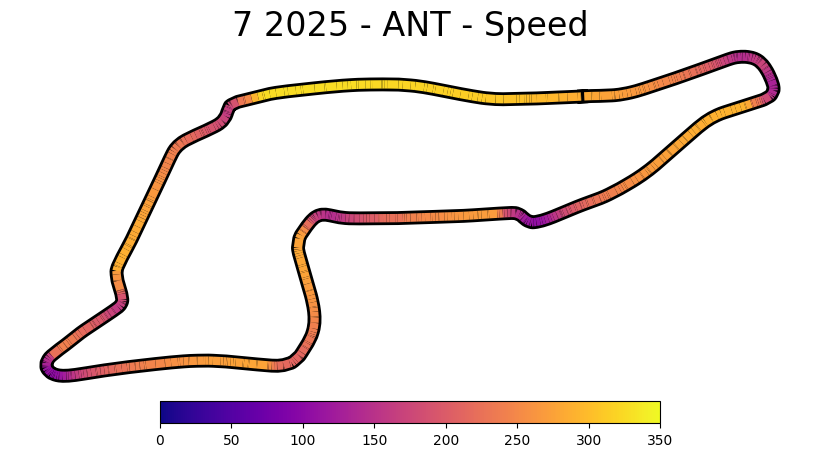

In [6]:
# We create a plot with title and adjust some setting to make it look good.
# fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10,4.5))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=10, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, 350)
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=6)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=0, vmax=350)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()


---

This is the end of the notebook.